###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, heterogeneous models are from [this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The Finite-Difference Method/fd_ac2d_heterogeneous.ipynb) by Heiner Igel ([@heinerigel](https://github.com/heinerigel)), Florian Wölfl and Lion Krischer ([@krischer](https://github.com/krischer)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/), notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO

# 粘弹性: 介绍

作为介绍，我们首先区分地震波的弹性“阻尼”效应与非弹性阻尼效应的不同。我们如何描述地震阻尼，原因是什么?

In [1]:
# Import Libraries 
# ----------------
import numpy as np
from numba import jit
import matplotlib
import matplotlib.pyplot as plt
from tew2.FD_2DAC import FD_2D_acoustic_JIT
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.axes_grid1 import make_axes_locatable

## 弹性波的“阻尼”

即使没有粘弹性效应，地震波也可以被阻尼。

由于**几何扩散**，地震能量分布在波前面，如下面的声学建模结果所示:

nx =  400
nz =  400
nt =  578


<IPython.core.display.Javascript object>


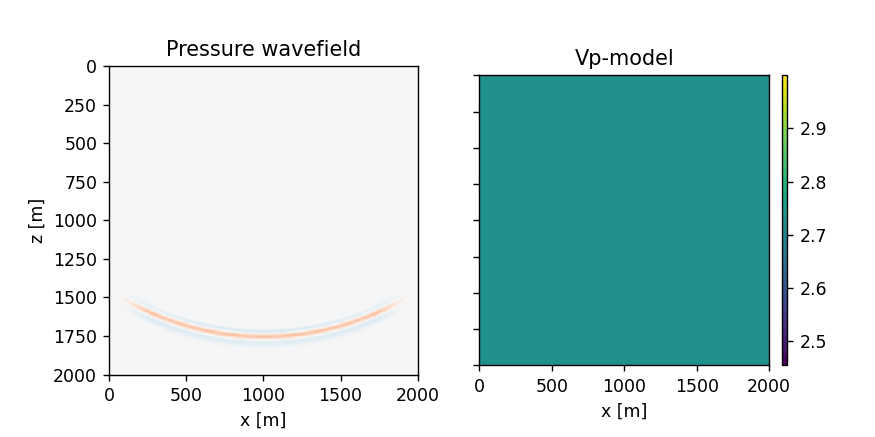

In [2]:
%matplotlib notebook
time, seis_hom = FD_2D_acoustic_JIT('hom')

另一种阻尼地震波场的方法是将地震能量 **散射** 到小尺度的结构上，比如这个声学例子中的随机介质:

nx =  400
nz =  400
nt =  890


<IPython.core.display.Javascript object>


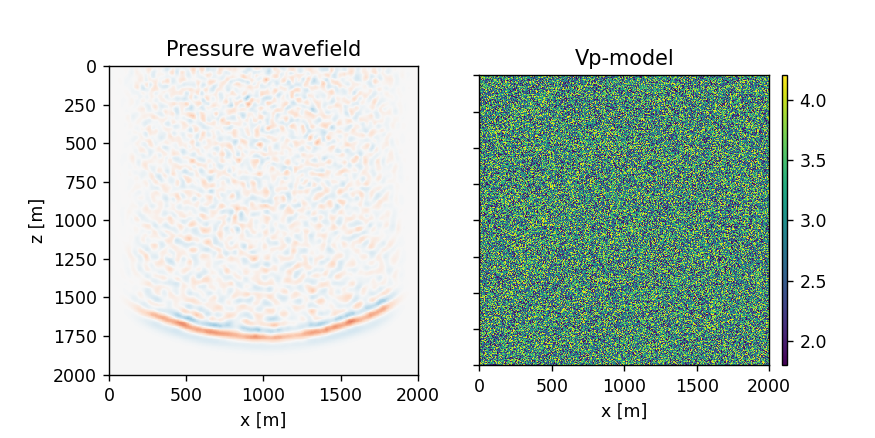

In [4]:
%matplotlib notebook
time_rand, seis_rand = FD_2D_acoustic_JIT('rand')

通过比较均匀介质和随机介质的地震图，我们认识到一个显著的振幅差异。还要注意重要的地震尾段

<IPython.core.display.Javascript object>


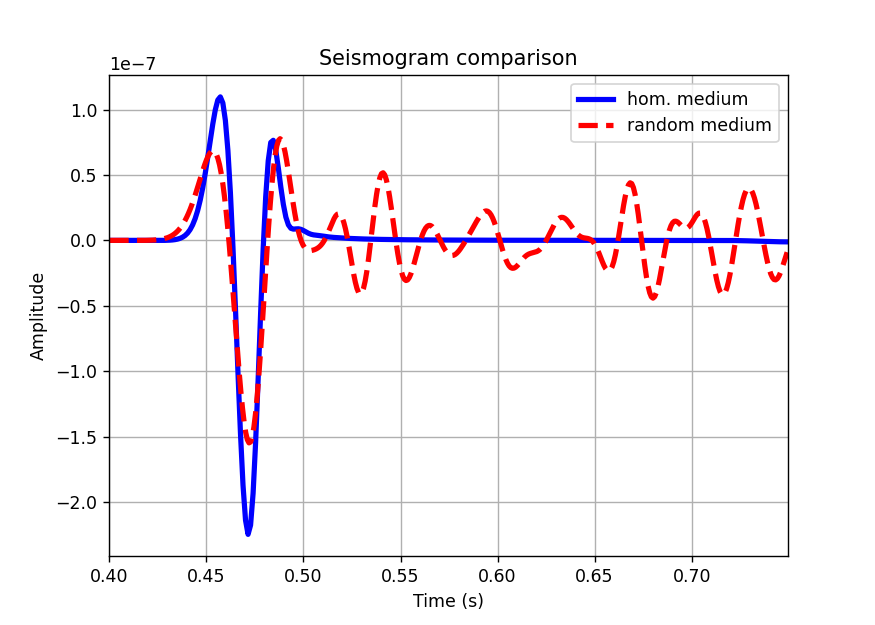

In [5]:
%matplotlib notebook
# Compare FD seismograms
# ----------------------
# Define figure size
rcParams['figure.figsize'] = 7, 5

# plot seismogram hom. model
plt.plot(time, seis_hom, 'b-',lw=3,label="hom. medium") 

# plot seismogram random model
plt.plot(time_rand, seis_rand, 'r--',lw=3,label="random medium")
plt.xlim(0.4, time[-1])
plt.title('Seismogram comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## 非弹性阻尼的影响

与上述弹性阻尼效应相比，**固有阻尼** 基于地震能量向热或不可逆介质变形的转换。我们可以定量化地震波的阻尼通过 ...

* ... 一个阻尼系数 $\alpha$, 平面波的位移描述为

\begin{equation}
u(t) = u(0) exp(-\alpha x)\notag
\end{equation}

这里 $x$ 表示地震波的路径长度

* ... 品质因子 Q ,它定义了地震波的吸收通过

\begin{equation}
\frac{1}{Q} = \frac{\Delta E}{2 \pi E_0}\notag
\end{equation}

它是一个周期所吸收能量 $\Delta E / 2 \pi$ 相对于一个变形周期所储存的最大弹性能量 $E_0$ 的度量。在地震波的情况下, **品质因子对于所有频率都是恒定的** $\mathbf{Q(\omega)=const}$。这意味着对高频波的吸收更强，因为与低频波相比，高频波的循环次数更多。这个定义的问题是，如果没有额外的模型，就不容易定义 $E_0$ 。


$\Delta E / 2 \pi$$E_0$


在接下来的课程中，我们将通过宏观的数学物理模型描述粘弹性效应。更详细地了解地震阻尼可以通过岩石物理模型来实现，不幸的是，这超出了本讲座的范围。

## 我们学习到:

- 弹性“阻尼”(地震能量的几何扩散/散射)和非弹性(粘弹性)阻尼效应之间的差异
- 如何通过阻尼系数或品质因子Q来量化阻尼效应
- 地震波传播中的频率无关Q意味着高频率比低频率具有更强的阻尼